<img style="direction:rtl;" src="./../data/besm.png" alt="In the name of Allah" width="150">

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm

In [2]:
chineas_alphabet = ["诶","诶","必","比西","西弟","迪衣","伊艾付","艾弗","记","吉","爱耻","艾尺","挨","艾","宅","杰","开","开","饿罗","艾勒","饿母","艾马","恩","艾娜","呕","","哦","披","屁","酷","吉吾","耳","艾儿","艾斯","艾丝","踢","提","tí忧","伊吾","维","维","大波留","豆贝尔维","埃克斯","艾克斯","歪","吾艾","再得","贼德"]
persian_alphabet = ["آ","ا","ب","پ","ت","س","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","ل","م","ن","و","ه","ی"]
other_alphabet = ["ي", "ڈ", "ۍ", "څ", "ۀ", "ې", "ځ", "ډ", "ټ","ړ", "ڼ","ؤ", "ږ","ښ"]
decorativeـsigns = [" ", ",", ":", "؛", "|", "\\", "*", " ", "٬", "!", "؟", "?", "(", ")", ".", "،"]
number_alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [3]:
emojis_df = pd.read_csv("./../data/emojis.csv", names=["emoji", "desciption"])
emoji_alphabet = emojis_df.emoji.to_numpy()
emojis_df.head()

,emoji,desciption
0,😀,Grinning Face
1,😁,Beaming Face With Smiling Eyes
2,😂,Face With Tears of Joy
3,🤣,Rolling on the Floor Laughing
4,😃,Grinning Face With Big Eyes


In [238]:
f = open(f"./../result/comments_1.txt", "r")
text = f.readlines()
f.close()

# remove duplicate rows if exists
text = list(dict.fromkeys(text))

# replace \t\t to \t in all rows if exists
f = open("./../result/comments_edited.txt", "w")
for i in range(len(text)):
    text[i] = text[i].replace('\t\t','\t')
    f.write(text[i])
f.close()


comments_df

,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه ه...
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,خییلی قشنگ بودیکی از بهترین پایان هایی بود که ...
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را...
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,ارزش وقت گذاشتن رو داره پشیمون نمیشین
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب ...
...,...,...,...
223925,horror,فیلم یتیم خانه دانلود و تماشای رایگان|فیلیمو,متوسطه
223926,horror,فیلم یتیم خانه دانلود و تماشای رایگان|فیلیمو,ترسناکه خیلی😩
223927,horror,فیلم یتیم خانه دانلود و تماشای رایگان|فیلیمو,خوب بود😆😕😐😉
223928,horror,فیلم یتیم خانه دانلود و تماشای رایگان|فیلیمو,یکی از بهترین فیلمهایی که دیدم


In [4]:
sam = pd.read_csv('./../result/sam.txt', names=['g', 't', 'c'], delimiter='\t')

In [5]:
sam

,g,t,c
0,drama,دانلود و تماشای آنلاین سریال یاغی [نسخه کامل ب...,NaN
1,NaN,فقط همین قسمت اول درحد یه فیلم سینمایی کاربرده...,NaN


In [274]:
data = ''
for i, t in enumerate(comments_df['comment']):
    if type(t) == str:
        if 'فیلم رنگو دانلود و تماشای رایگان' in t:
            data = comments_df.loc[i]['comment']

In [275]:
data = data.split('\n')
data = [i.split('\t') for i in data]
data[1]

['adventure',
 'سریال پرنسس سوفیا دانلود و تماشای رایگان|فیلیمو',
 'خیلی فیلم خوبی هست']

In [38]:
f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()
print(f"Number of comments that contains emoji: {len(comments_with_emoji)}")

Number of comments that contains emoji: 89898


In [39]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

In [70]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

In [ ]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in comments_with_emoji:
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

In [62]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	16907
 1	❤	14314
 2	👌	12462
 3	👍	9731
 4	😂	6675
 5	😘	4734
 6	👏	4320
 7	🤩	3364
 8	🤣	2935
 9	♥	2846
10	🌹	2388
11	😭	2273
12	😊	2089
13	🙏	2059
14	💜	1854
15	💙	1728
16	😁	1555
17	💖	1509
18	😅	1090
19	😉	1082
---------------------
The percentage of emojis in the text compared to the total emojis: [49.57%]


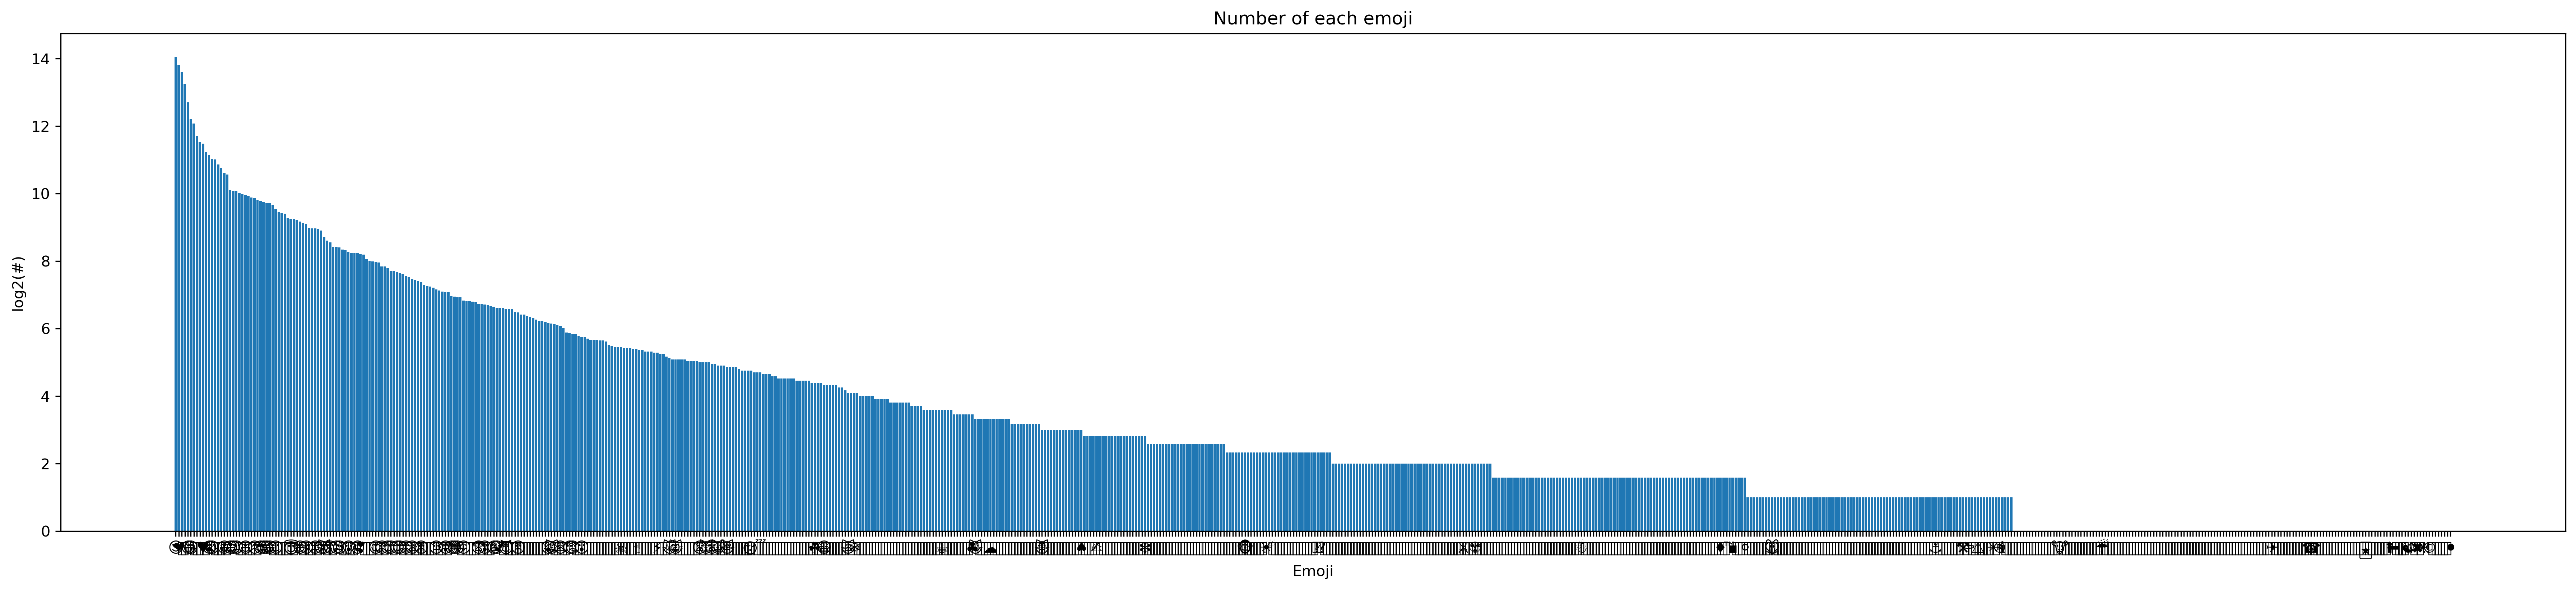

In [28]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

### Preprocessing

In [88]:
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
from hazm import *
import tqdm
import random

<div style="direction:rtl;">پیش پردازش اولیه متن:</div>
<ul style="direction:rtl;">
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
</ul>  

In [128]:
comments = []
for comment in tqdm.tqdm(comments_with_emoji):
    comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())

head_list(comments, sep='\n')

100%|█████████████████████████████████████████████████████████████████████████| 89898/89898 [00:00<00:00, 849432.17it/s]

['توی', '۸', 'ساعت', 'مهلت', 'فیلم', '۲', 'بار', 'این', 'فیلم', 'بی', 'نظیر', 'را', 'دیدم،', 'واقعیت', 'جامعه', 'و', 'واقعا', 'و', 'به', 'شدت', 'با', 'احساساتم', 'بازی', 'شد،', 'حتما', 'پیشنهاد', 'میکنم.', 'کاش', 'بیشتر', 'از', 'این', 'فیلم', 'حمایت', 'میشد.', 'با', 'فیلم', 'های', 'هالیوودی', 'برابری', 'میکرد🤣🤣🤣']
['ارزش', 'دیدن', 'داره👌']
['پسندیدم', '👍']
['عااااااااالی', 'بود', '.', 'با', 'بازی', 'آقای', 'درخشانی', 'عزیز', 'عالی', 'ترم', 'شد', '.', 'خیلی', 'قشنگ', 'بود.لذت', 'بردم.👏👏👏']
['خیلی', 'خوب', 'بود👌👌']
['خوب', 'بود', '👏❤']


In [229]:
def delete_agmented_data(text):
    aug = {'اا':'ا', 
           'ییی':'یی',
           'هه':'ه',
           'لل':'ل', 
           'عالیی':'عالی', 
           'رر':'ر', 
           'عع':'ع', 
           'وو':'و', 
           'دد':'د', 
           'تت':'ت', 
           'خخ':'خ', 
           'ممم':'مم', 
           'فف':'ف'}
    for k in aug:
        while k in text:
            text = text.replace(k, aug[k])
    return text

In [230]:
delete_agmented_data("واقعااااا"), delete_agmented_data("عاااالییییی"), delete_agmented_data("عالیهههه")

('واقعا', 'عالی', 'عالیه')

<div style="direction:rtl;">نرمال سازی متن با استفاده از تابع <code>normalize</code> از کتابخانه <code>hazm</code></div> 

In [231]:
normalizer = Normalizer()
comments_normalized = [[delete_agmented_data(normalizer.normalize(y)) for y in x] for x in tqdm.tqdm(comments)]

100%|██████████████████████████████████████████████████████████████████████████| 89898/89898 [00:07<00:00, 11868.76it/s]


In [240]:
for x in random.sample(comments_normalized, 30):
    print(' '.join(x))

خیلی قشنگ بود♥️
خلی آلی بود😍😍😍😘😘😘🤩🤩🤩
عالی بود😍
خیلی باحال بود 😐😂😂
موسیقی این قیل خیلی تائثیر گار بود و لذت فیلم رو بیشتر کرد خیلی بازیگرانشون عالی بودن و من از اهنگساز و نویسنده و کارگردان شدیدا ممنونم❤
عالی بود ماجراجویی در پاریس فیلم سینماییش 👍👍👍
خیلی خوب بود😔❤
عالی بود 👌
من من عاشق این فیلم هستم 😥😥😥😥
یکش بهتر و هیجانی تر بود🧟‍♀️
وای مردم از خنده😂😂😂🤣🤓
خیلی قشنگ بود ، 🤣❤️❤️❤️❤️❤️❤️👍
آقا رضا شفیعی جم کفت من برم بخوابم 😂😂😂😂😂😂😂😂😂😂😂😂😂
وای واقعا ناراحت کننده بود 😔🤧🤧😪
خیلی خیلی خیلی خیلی دوستش داشتم 😘😘😘😘😜
عالی😁👍
فوق العاده 👏👏👏
بسیار عالی بود ممنون هستم از فیلیمو که با نسخه دوبله ارائه کرد تشکر فراوان 🌹
ای کاش جک هم زنده میموندلم سوخت😔
😘😘عالی بود
من این فیلمو یه بار تو سینما دیدم خیلی عالیست ببینید👍👍👍👍
همگی زیادی عالی بودن 💕❤👍😍😍😍😍🙆‍♀️💥💥💥
عالی بود😍👍👌
adventure فیلم رنگو دانلود و تماشای رایگان|فیلیمو واقعا فیلم جالبیه
عالی بود فوق العاده دوبله ی بسیار طنزی داشت عالی👌🤯⁦❤️⁩⁦❤️⁩
بازی شون افتضاحه 👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻👎🏻
واقعا فیلمش عالیه 👌
عالی درجه یکککککککککککک همه بازیگرا عالی خصوص

In [218]:
comments_sentences = [sent_tokenize(' '.join(x)) for x in tqdm.tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 89898/89898 [00:00<00:00, 382833.05it/s]


In [174]:
for x in random.sample(comments_sentences, 30):
    print(' ### '.join(x))

فیلم بدی نبود اما خوبم نبود ولی در کل دیدم 😅
من هنوز ندیدم ولی فکر کنم عالی، 🤔🤔🤔
خیلیییی برنامه ی جذابی هست من اول علاقه ای به دیدن این برنامه نداشتم ولی الان که دیدم خیلی خندیدم و خیلی زیاد چیزی یاد گرفتم ممنونم از سازندش و فیلیمو👏👏😍
اهنگشم عالی بود🥺🧡
تک وعالی 👌👌
قسمت اخرش خیلی رمز و راز داره من فکر میکنم جوری که پیر مرده رفتار میکرد یه دلیل قانع کننده داره برای این که بازی رو راه انداخته😂
عالیهعههه من ۱۲ سالمه و دارم میبینم طاقت نیووردم😁😂🧡
واقعا فوق العادست💙
عالیه 😍
من این فیلم رو ۳یا ۴ بار دیدم🤍🤍 خیلی ممنون و سپاسگذارم از سازندش🙏🏻🙏🏻🙏🏻🙏🏻
بسیار زیبا و تاثیر گذار بود 🙏❤
خیلی قشنگ بو د واقعا قشنگ بازی کردن 👌
باز هم از شاهنامه فیلم بسازید عاللللی بود👍👍
یعنی من ۸۰ میلیون بار این فیلم رو دیدم میخوام بازم ببینم ممنونم از سازندش 🌹🌹
خیلی فوق العاده بود حتما حتما ببینید ، مخصوصا آخرش موهای تنم سیخ شد 🤩🤩🤩
😑😑اینا چیه واقعا فیلمی که بشه حدس زد امتیازش صفره
عالی بود 😁
من اول توی اسپایدرمن با تام هالند اشنا شدم و ازش خوشم میاد خلاصه عالی بود😍😍😍😍😍
خییییییییییییییییییییییلی عالی بود😍😍😍😍😍😍😍😍😍
عالی بود

In [175]:
comments_tokens = [[word_tokenize(sent) for sent in sents] for sents in tqdm.tqdm(comments_sentences)]

100%|█████████████████████████████████████████████████████████████████████████| 89898/89898 [00:00<00:00, 113457.60it/s]


In [176]:
for x in random.sample(comments_tokens, 30):
    print(x)

[['خیلی', 'خوب', 'بود😂♥️']]
[['فیلم', 'عالیبازی', 'امیلی', 'کلارک', 'عالیه👌']]
[['روحت', 'شاد', 'حاج', 'قاسم🖤🖤🖤🖤']]
[['تاثیر', 'گذار', 'و', 'جذاب👌🏻']]
[['عالی', '👌👌👏👏👏❤️']]
[['واییی', 'عالی', 'بود', '😍😍😍😍😍کاملا', 'مشخصه😂😂', 'که', 'روش', 'فکر', 'شده']]
[['خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلی', 'خیلییییییییییییییییییییییفیلم', 'محشر', 'و', 'نابی', 'بود', 'فوق', 'العادس', 'بهترین', 'قسمتشه', '😍😍😍😍😍😍😇😇😇😇']]
[['عالی😻😻']]
[['فوق\u200cالعادست', '❤❤❤❤']]
[['این', 'سریال', 'هم', 'مثل', 'شهرزاد', 'می', 'ترکونه🤣🤣🤣']]
[['خیلی', 'عالی😍😍']]
[['بخدا', 'این', 'کمدی', 'ترین', 'فیلم', 'ترسناکی', 'بود', 'که', 'تا', 'حالا', 'دیدم', 'خیلی', 'خیلی', 'عالی', 'بود', 'بازم', 'از', 'این', 'نوع', 'بگذارید', 'مرسی', '😂😂😂']]
[['عالی', 'عالی', 'عالی', 'عالی', 'بود', 'بود', 'بود', 'بود', 'خیلی', 'خیلی', 'ممنون', 'فیلیمو🙏🙏🙏🙏🙏🙏❤❤❤💓']]
[['عالی', 'عالی', '😍😍😍😍😍😍😍😍😍😍🌋']]
[['عالی', 'بود', 'و', 'اینکه', 'آخر', 'فیلم', 'مبهوت', 'باقی', 'موندم', 'ولی', 'به', 'نظرم', 'تدی', 'دیوانه', 'نبود☹️😍']]
[['خیلی', 'خیل

In [16]:
comments['title'][0].split('|')[0]

'فیلم قدغن'

In [18]:
contain_values = comments[comments['title'].str.contains(comments['title'][0].split('|')[0])]
f = open('./../result/test_cloud.txt', 'w')
for comment in contain_values['comment']:
    f.write(f'{comment}\n')
f.close()

In [24]:
f = open('./../result/test_cloud.txt', 'r')
text = ''
for t in f.readlines():
    text = f'{text} {t}'
f.close()

text = text.replace('\n', ' ')
text

' دیدن این فیلمو به همه پیشنهاد میکنم.متاسفانه هستن هوس بازای پولداری که فک میکنن میشه عفت و آبرو رو با پول خرید.و یه نقش متفاوت از سام درخشانی  خییلی قشنگ بودیکی از بهترین پایان هایی بود که تاحالا دیدمآخرش با کار مرتضی از ته دل دلم خنگ شد  درسته غمگین بود ولی زیبا بود پیشنهاد میکنم ببینید و نیدونم چرا رای کم آورده حقش خیلی بیشتره و به نظر من باید جایزه های زیادی میبرد  توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را دیدم، واقعیت جامعه و واقعا و به شدت با احساساتم بازی شد، حتما پیشنهاد میکنم. کاش بیشتر از این فیلم حمایت میشد. با فیلم های هالیوودی برابری میکرد🤣🤣🤣  ارزش وقت گذاشتن رو داره پشیمون نمیشین  بسیار فیلم قشنگی بود مخصوصا آخر فیلم خیلی خوب تمام شد عااالی  عاالی بود   بسیار زیبا بود   عالی و اموزنده  ارزش دیدن داره👌  خیلی قشنگه، عالی  عالی،حتما ببینین.  خیلی خوب بود  عالی بود واقعا پیشنهاد میکنم ببینیم فقط نمیدونم چرا رای کم آورده   خوب بود، ارزش دیدن داشت.   بسیار عالی   قشنگ بود  پسندیدم 👍  خیلی قشنگ بود و لذت بردم بازی سام درخشانی عالی بود   واقعا عالی بود   خیلی خوب بود.  خیلی

In [40]:
wordcloud = WordCloudFa(persian_normalize=True, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
image.show()

In [5]:
movies = pd.read_csv("./../result/movies.txt", names=["genre", "url"], delimiter='\t')
movies

,genre,url
0,drama,https://www.filimo.com/m/0v9if
1,drama,https://www.filimo.com/m/i3uga
2,drama,https://www.filimo.com/m/p8yhg
3,drama,https://www.filimo.com/m/vsucQ
4,drama,https://www.filimo.com/m/6lx40
...,...,...
4938,theatre,https://www.filimo.com/m/y078s
4939,theatre,https://www.filimo.com/m/0yiac
4940,theatre,https://www.filimo.com/m/ildr4
4941,theatre,https://www.filimo.com/m/eqwkc


In [6]:
genres = ["drama", "war", "adventure", "sci-fi", "romance", 
          "horror", "mystery", "family", "musical", "talk-show", 
          "short", "reality-tv", "history", "action", "fantasy", 
          "comedy", "western", "crime", "thriller", "sport", 
          "documentary", "music", "religious", "concert", 
          "biography", "theatre"]

num = {}
for m in genres:
    num[m] = 0
for m in movies["genre"]:
    num[m] += 1
num

{'drama': 752,
 'war': 82,
 'adventure': 483,
 'sci-fi': 113,
 'romance': 150,
 'horror': 200,
 'mystery': 165,
 'family': 234,
 'musical': 49,
 'talk-show': 70,
 'short': 152,
 'reality-tv': 35,
 'history': 111,
 'action': 569,
 'fantasy': 118,
 'comedy': 415,
 'western': 28,
 'crime': 381,
 'thriller': 236,
 'sport': 50,
 'documentary': 228,
 'music': 30,
 'religious': 42,
 'concert': 18,
 'biography': 208,
 'theatre': 24}

In [17]:
num['drama'] + num['war'] + num['adventure'] + num['sci-fi'] + num['romance'] \
+ num['horror'] + num['mystery'] + num['family'] + num['musical'] + num['talk-show'] \
+ num['short'] + num['reality-tv'] + num['history'] + num['action'] + num['fantasy'] \
+ num['comedy'] + num['western'] + num['crime'] + num['thriller'] + + num['sport'] \
+ num['documentary']


4621